In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = './data'
charts_dir = './charts'

algorithms = ['AMIS', 'tDSATUR', 'oDSATUR', 'interCS']

## Odd cycles

### Performance

In [3]:
perf_data_path = os.path.join(data_dir, 'odd_cycles_performance.csv')
df = pd.read_csv(perf_data_path, index_col=0)
df.head()

folds      graph      AMIS   tDSATUR   oDSATUR   interCS
0      2   cycle(5)  0.002714  0.000487  0.000465  0.002454
1      2   cycle(7)  0.003300  0.000794  0.000722  0.003115
2      2   cycle(9)  0.003835  0.001110  0.001063  0.003875
3      2  cycle(11)  0.005047  0.001479  0.001472  0.004577
4      2  cycle(13)  0.005851  0.001900  0.001905  0.005233

In [4]:
# some reshapings
cycle_lengths = df.graph.str.extract(r'cycle\((\d+)\)')
cycle_lengths = pd.to_numeric(cycle_lengths[0])
df = df.drop('graph', axis=1)
df.insert(1, column = 'cycle_length', value=cycle_lengths)

for col in algorithms:
    df[col] *=  1000

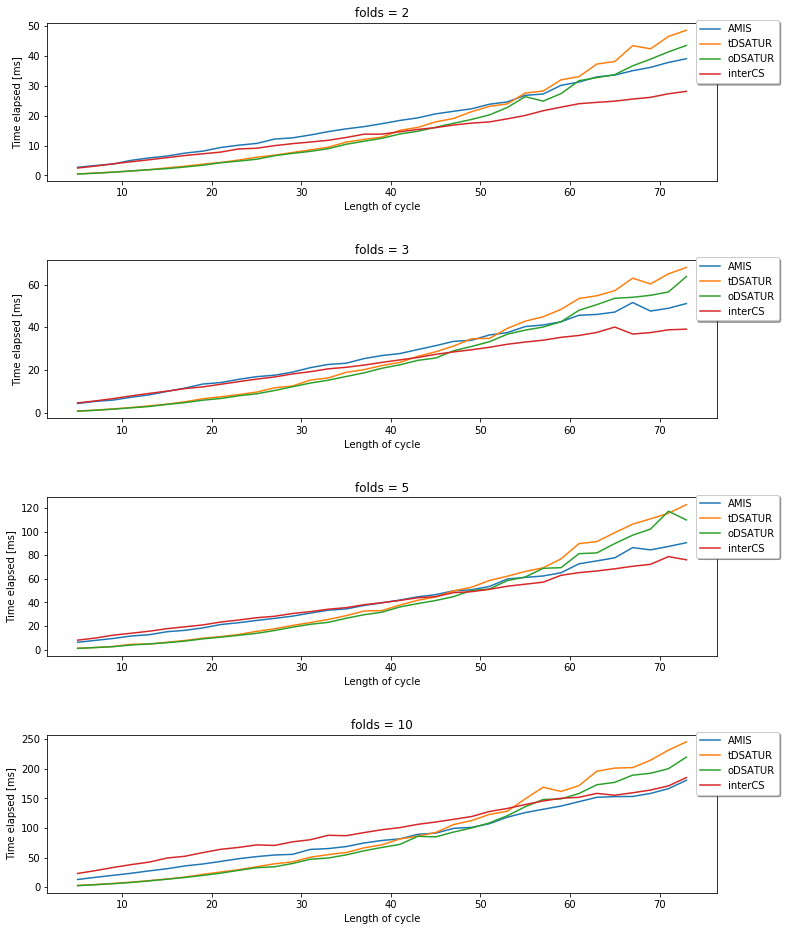

In [26]:
plt.figure(figsize=(12, 16))
plt.subplots_adjust(hspace=.5)

folds_list = df.folds.unique()
x = df.cycle_length.unique()
for i, folds in enumerate(folds_list):
    ax = plt.subplot(len(folds_list), 1, i + 1)
    for alg in algorithms:
        y = df[df.folds == folds][alg].values
        ax.plot(x, y, label=alg)
    
    plt.xlabel('Length of cycle')
    plt.ylabel('Time elapsed [ms]')
    plt.title('folds = {}'.format(folds))
    
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05), shadow=True, ncol=1)

plt.show()

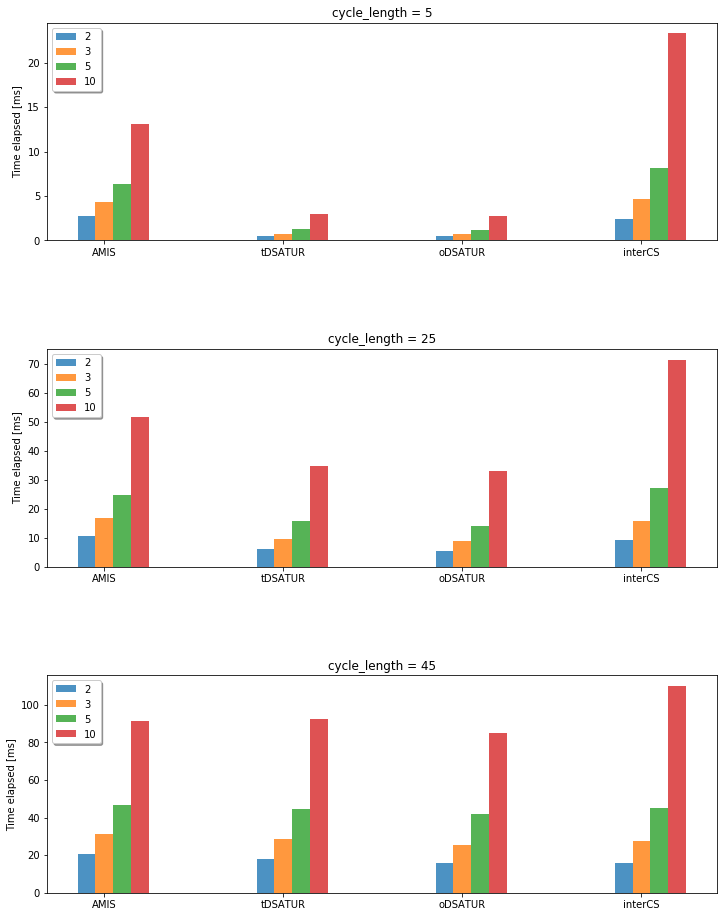

In [64]:
plt.figure(figsize=(12, 16))
plt.subplots_adjust(hspace=0.5)

bar_width = 0.1
opacity = 0.8

cycle_lengths = [5, 25, 45]
folds_list = df.folds.unique()
x = np.arange(len(algorithms))

for i, cycle_length in enumerate(cycle_lengths):
    ax = plt.subplot(len(cycle_lengths), 1, i + 1)
    for j, folds in enumerate(folds_list):
        y = df[(df['folds'] == folds) & (df['cycle_length'] == cycle_length)][algorithms].values[0]
        plt.bar(x + j * bar_width, y, bar_width, alpha=opacity, label=str(folds))

    plt.ylabel('Time elapsed [ms]')
    plt.xticks(x + (j - 2) * bar_width, algorithms)
    plt.title('cycle_length = {}'.format(cycle_length))
    plt.legend(loc='best',shadow=True, ncol=1)
    
plt.show()

### Accuracy

In [87]:
acc_data_path = os.path.join(data_dir, 'odd_cycles_accuracy.csv')
df = pd.read_csv(acc_data_path, index_col=0)
df.head()

folds      graph algorithm  ratio  percentage
0      2   cycle(5)      AMIS    2.5         100
1      2   cycle(5)   tDSATUR    3.0         100
2      2   cycle(5)   oDSATUR    3.0         100
3      2   cycle(5)   interCS    2.5         100
4      2  cycle(15)      AMIS    3.0         100

In [88]:
df[df['percentage'] != 100]['percentage'].any()

False

In [89]:
# some reshapings
cycle_lengths = df.graph.str.extract(r'cycle\((\d+)\)')
cycle_lengths = pd.to_numeric(cycle_lengths[0])
df = df.drop('graph', axis=1)
df = df.drop('percentage', axis = 1)
df.insert(1, column = 'cycle_length', value=cycle_lengths)

In [90]:
df.head()

folds  cycle_length algorithm  ratio
0      2             5      AMIS    2.5
1      2             5   tDSATUR    3.0
2      2             5   oDSATUR    3.0
3      2             5   interCS    2.5
4      2            15      AMIS    3.0

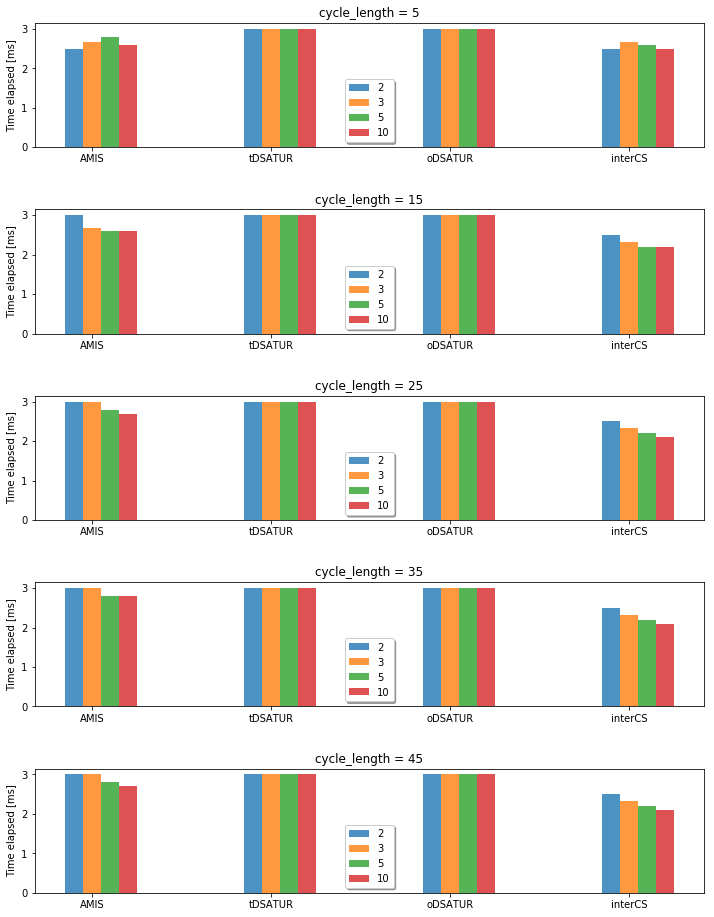

In [121]:
plt.figure(figsize=(12, 16))
plt.subplots_adjust(hspace=0.5)

bar_width = 0.1
opacity = 0.8

cycle_lengths = df.cycle_length.unique()
folds_list = df.folds.unique()
x = np.arange(len(algorithms))

for i, cycle_length in enumerate(cycle_lengths):
    ax = plt.subplot(len(cycle_lengths), 1, i + 1)
    for j, folds in enumerate(folds_list):
        y = df[(df['folds'] == folds) & (df['cycle_length'] == cycle_length)]
        y = y.ratio.values
        plt.bar(x + j * bar_width, y, bar_width, alpha=opacity, label=str(folds))

    plt.ylabel('Time elapsed [ms]')
    plt.xticks(x + (j - 2) * bar_width, algorithms)
    plt.title('cycle_length = {}'.format(cycle_length))
    plt.legend(loc='best',shadow=True, ncol=1)
    
plt.show()

In [154]:
parts = dict()
for i, alg in enumerate(algorithms):
    parts[i] = df[df['algorithm'] == alg]
    parts[i] = parts[i].drop('algorithm', axis = 1)
    parts[i] = parts[i].rename(columns = {'ratio': alg})
    
comp = parts[0]
for i in range(1, len(parts)):
    comp = pd.merge(comp, parts[i], left_on=['folds', 'cycle_length'], right_on=['folds', 'cycle_length'])
comp = comp.sort_values(['cycle_length', 'folds'])

print(comp.to_csv(sep=',', index=False))

folds,cycle_length,AMIS,tDSATUR,oDSATUR,interCS
2,5,2.5,3.0,3.0,2.5
3,5,2.67,3.0,3.0,2.67
5,5,2.8,3.0,3.0,2.6
10,5,2.6,3.0,3.0,2.5
2,15,3.0,3.0,3.0,2.5
3,15,2.67,3.0,3.0,2.33
5,15,2.6,3.0,3.0,2.2
10,15,2.6,3.0,3.0,2.2
2,25,3.0,3.0,3.0,2.5
3,25,3.0,3.0,3.0,2.33
5,25,2.8,3.0,3.0,2.2
10,25,2.7,3.0,3.0,2.1
2,35,3.0,3.0,3.0,2.5
3,35,3.0,3.0,3.0,2.33
5,35,2.8,3.0,3.0,2.2
10,35,2.8,3.0,3.0,2.1
2,45,3.0,3.0,3.0,2.5
3,45,3.0,3.0,3.0,2.33
5,45,2.8,3.0,3.0,2.2
10,45,2.7,3.0,3.0,2.1



## Kneser graphs

### Performance

In [250]:
perf_data_path = os.path.join(data_dir, 'kneser_graphs_performance.csv')
df = pd.read_csv(perf_data_path, index_col=0)
df.head()

folds        graph      AMIS   tDSATUR   oDSATUR   interCS
0      2  kneser(5,2)  0.004881  0.001383  0.001288  0.005078
1      2  kneser(6,2)  0.009329  0.003298  0.003622  0.011905
2      2  kneser(7,3)  0.019411  0.010800  0.010204  0.031207
3      2  kneser(8,3)  0.056184  0.026171  0.024763  0.052956
4      2  kneser(9,4)  0.093198  0.125706  0.114147  0.229401

In [251]:
for col in algorithms:
    df[col] *=  1000

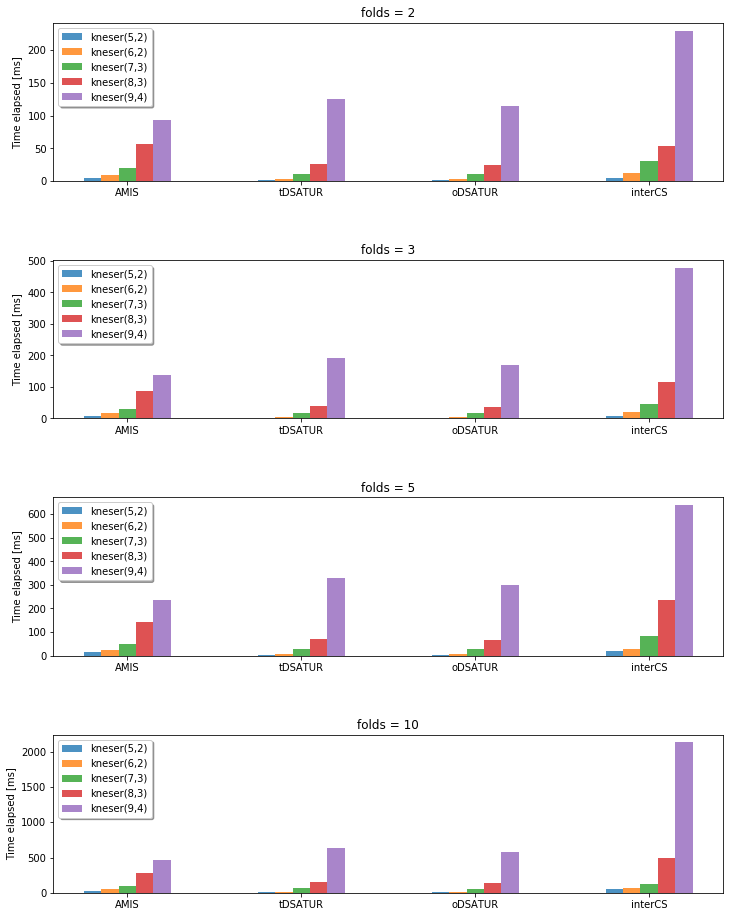

In [252]:
plt.figure(figsize=(12, 16))
plt.subplots_adjust(hspace=0.5)

bar_width = 0.1
opacity = 0.8

graphs = df.graph.unique()
folds_list = df.folds.unique()
x = np.arange(len(algorithms))

for i, folds in enumerate(folds_list):
    ax = plt.subplot(len(folds_list), 1, i + 1)
    for j, graph in enumerate(graphs):
        y = df[(df['folds'] == folds) & (df['graph'] == graph)][algorithms].values[0]
        plt.bar(x + j * bar_width, y, bar_width, alpha=opacity, label=graph)

    plt.ylabel('Time elapsed [ms]')
    plt.xticks(x + (j - 2) * bar_width, algorithms)
    plt.title('folds = {}'.format(folds))
    plt.legend(loc='upper left',shadow=True, ncol=1)
    
plt.show()

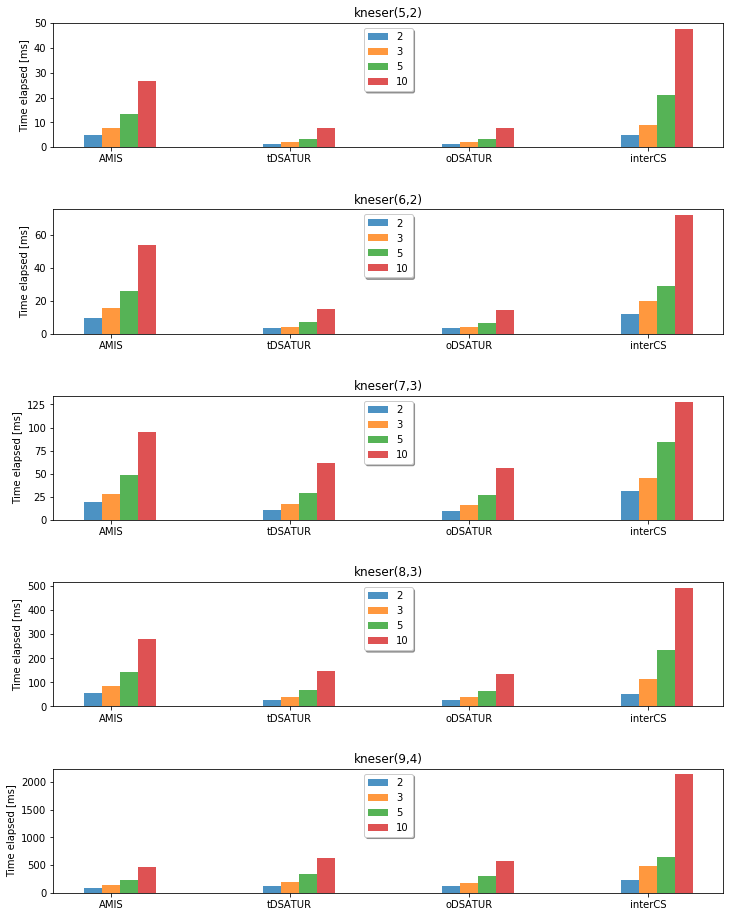

In [169]:
plt.figure(figsize=(12, 16))
plt.subplots_adjust(hspace=0.5)

bar_width = 0.1
opacity = 0.8

graphs = df.graph.unique()
folds_list = df.folds.unique()
x = np.arange(len(algorithms))

for i, graph in enumerate(graphs):
    ax = plt.subplot(len(graphs), 1, i + 1)
    for j, folds in enumerate(folds_list):
        y = df[(df['folds'] == folds) & (df['graph'] == graph)][algorithms].values[0]
        plt.bar(x + j * bar_width, y, bar_width, alpha=opacity, label=str(folds))

    plt.ylabel('Time elapsed [ms]')
    plt.xticks(x + (j - 2) * bar_width, algorithms)
    plt.title(graph)
    plt.legend(loc='upper center',shadow=True, ncol=1)
    
plt.show()

### Accuracy

In [253]:
acc_data_path = os.path.join(data_dir, 'kneser_graphs_accuracy.csv')
df = pd.read_csv(acc_data_path, sep='\t', index_col=0)
df.head()

folds        graph algorithm  ratio  percentage
0      2  kneser(5,2)      AMIS    2.5         100
1      2  kneser(5,2)   tDSATUR    3.0         100
2      2  kneser(5,2)   oDSATUR    3.0         100
3      2  kneser(5,2)   interCS    2.5          87
4      2  kneser(5,2)   interCS    3.0          13

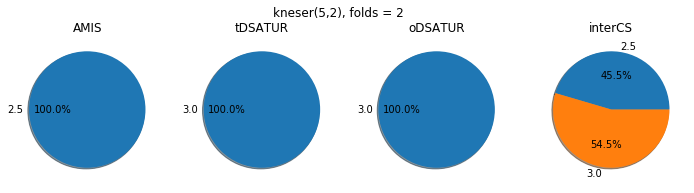

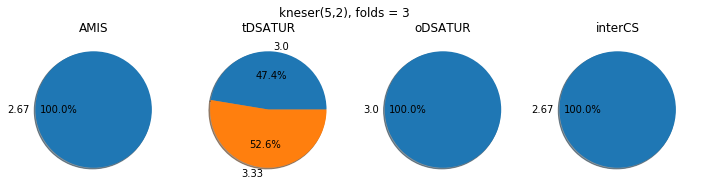

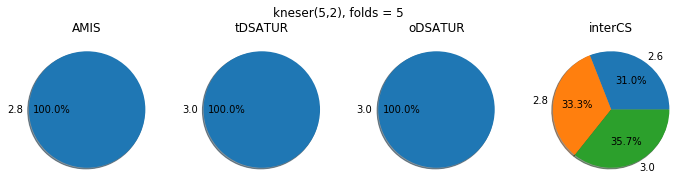

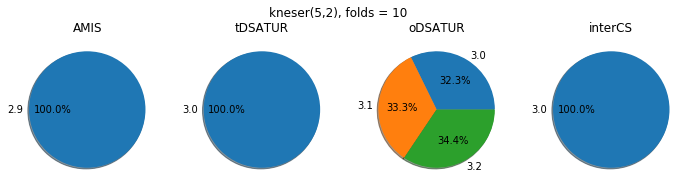

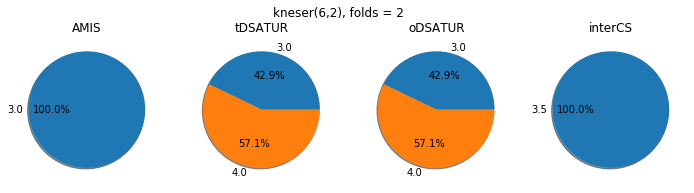

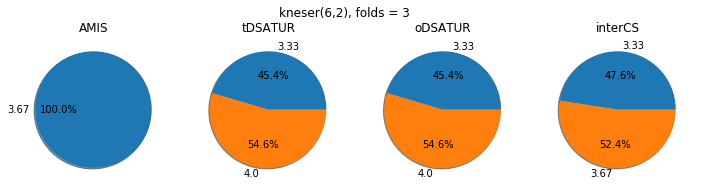

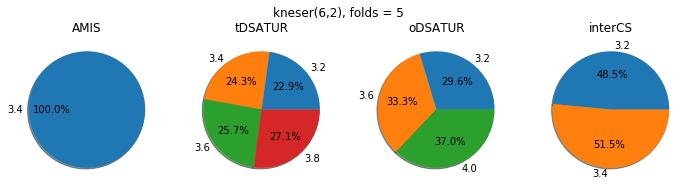

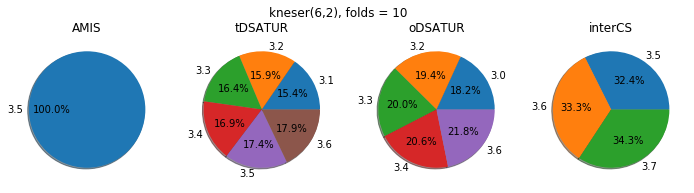

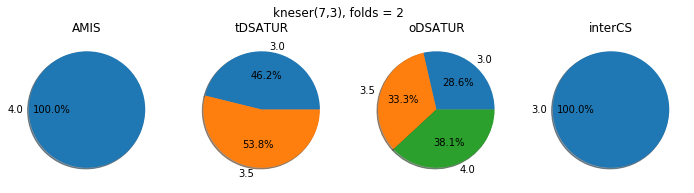

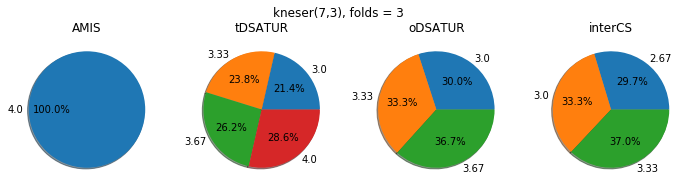

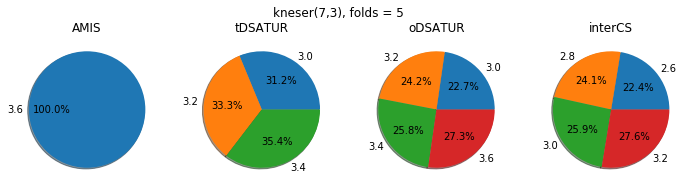

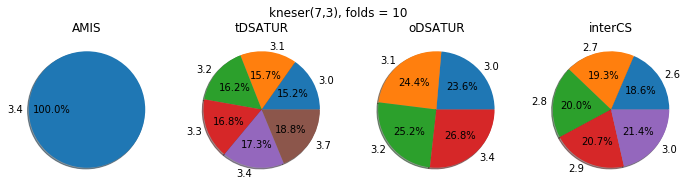

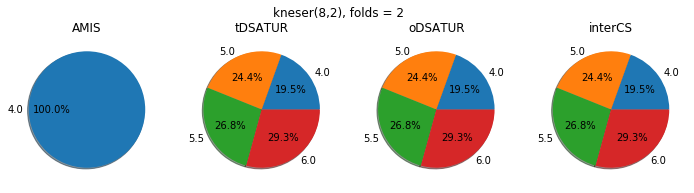

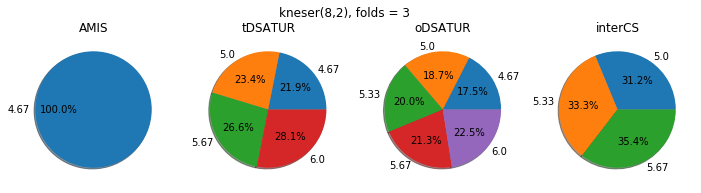

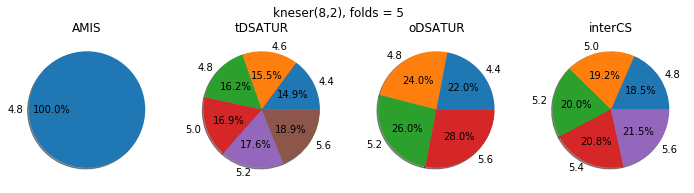

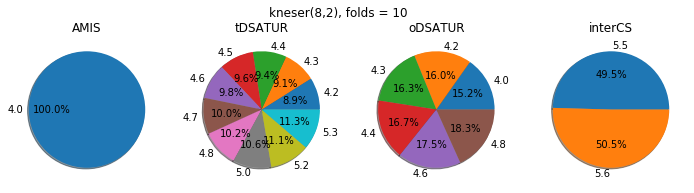

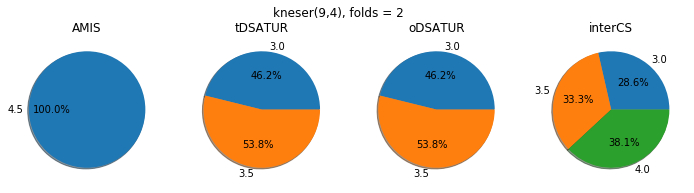

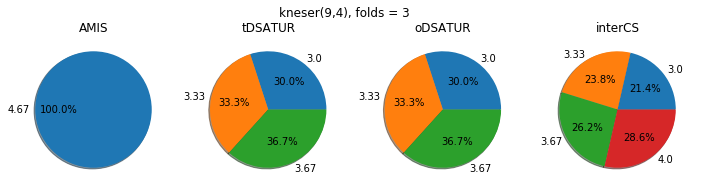

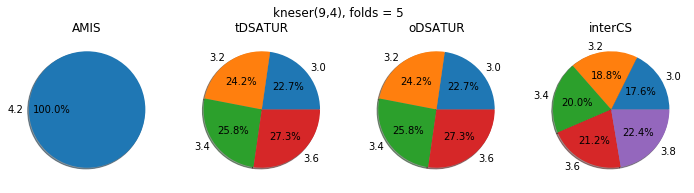

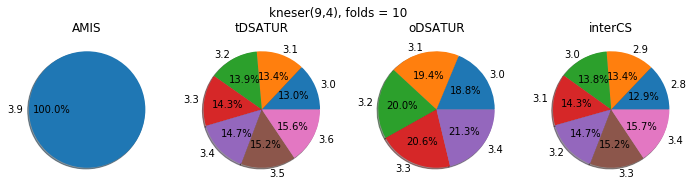

In [240]:
graphs = df.graph.unique()
folds_list = df.folds.unique()
x = np.arange(len(algorithms))

for graph in graphs:
    for i, folds in enumerate(folds_list):
        plt.figure(figsize=(12, 3))
        for j, alg in enumerate(algorithms):
            ax = plt.subplot(1, len(algorithms), j + 1)
            vals = df[(df['folds'] == folds) & (df['graph'] == graph) & (df['algorithm'] == alg)]
            accuracies = vals.ratio.values
            percentages = vals.ratio.values
            plt.pie(percentages, labels=accuracies, autopct='%1.1f%%', shadow=True)
            plt.title(alg)

        plt.suptitle('{}, folds = {}'.format(graph, folds))
        plt.show()

In [264]:
df.loc[df.groupby(['folds', 'graph'])['ratio'].idxmin()].sort_values(['graph', 'folds'])

folds        graph algorithm  ratio  percentage
0        2  kneser(5,2)      AMIS   2.50         100
39       3  kneser(5,2)      AMIS   2.67         100
89       5  kneser(5,2)   interCS   2.60          44
144     10  kneser(5,2)      AMIS   2.90         100
5        2  kneser(6,2)      AMIS   3.00         100
45       3  kneser(6,2)   tDSATUR   3.33          89
93       5  kneser(6,2)   tDSATUR   3.20          83
157     10  kneser(6,2)   oDSATUR   3.00          30
12       2  kneser(7,3)   tDSATUR   3.00          91
59       3  kneser(7,3)   interCS   2.67           8
110      5  kneser(7,3)   interCS   2.60           3
176     10  kneser(7,3)   interCS   2.60          10
18       2  kneser(8,2)      AMIS   4.00         100
62       3  kneser(8,2)      AMIS   4.67         100
115      5  kneser(8,2)   tDSATUR   4.40          74
181     10  kneser(8,2)      AMIS   4.00         100
32       2  kneser(9,4)   tDSATUR   3.00          60
76       3  kneser(9,4)   tDSATUR   3.00          40
131      5  kneser(9,4)   tDSATUR   3.00          33
213     10  kneser(9,4)   interCS   2.80           1

In [ ]:
df.groupby(['folds', 'graph']).transform(lambda x: )

## Queen graphs

### Accuracy

In [247]:
acc_data_path = os.path.join(data_dir, 'queen_graphs_accuracy.csv')
df = pd.read_csv(acc_data_path, index_col=0)
df.head()

folds         graph algorithm  ratio  percentage
0      2  queen5_5.col      AMIS    9.0         100
1      2  queen5_5.col   tDSATUR    5.0          99
2      2  queen5_5.col   tDSATUR    6.0           1
3      2  queen5_5.col   oDSATUR    5.0          98
4      2  queen5_5.col   oDSATUR    6.0           2

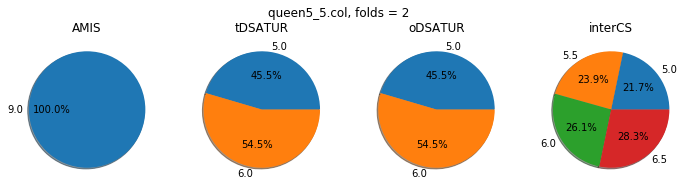

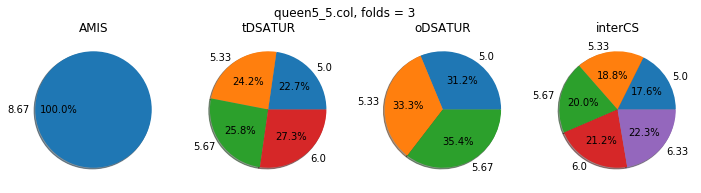

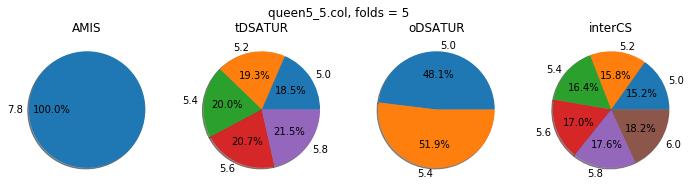

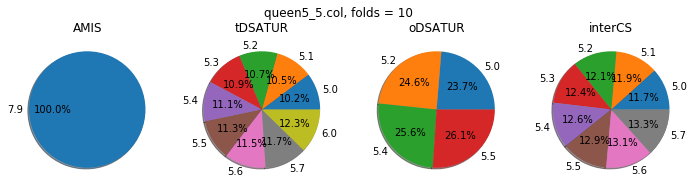

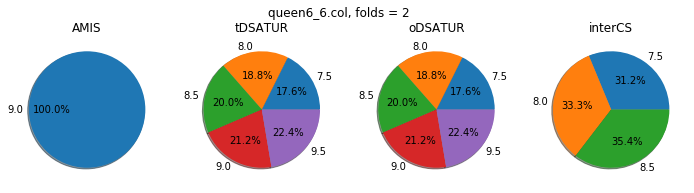

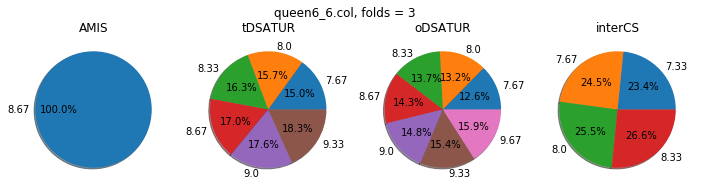

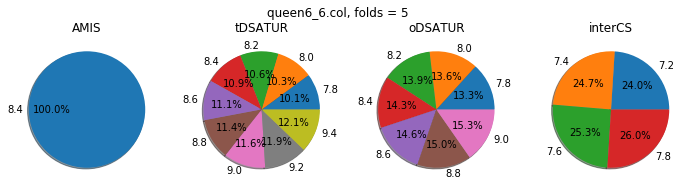

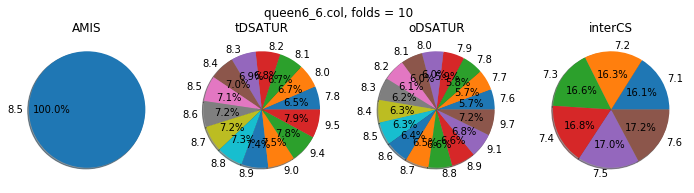

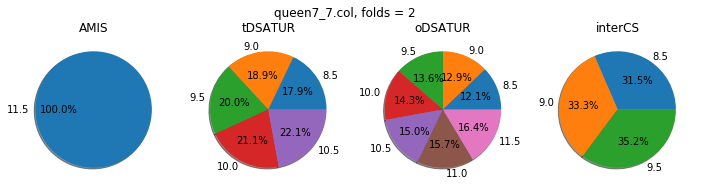

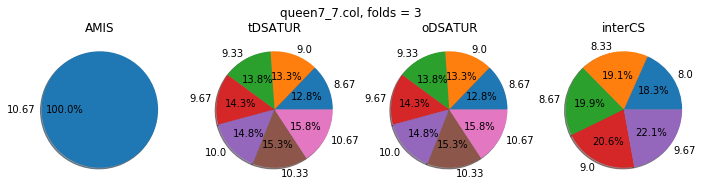

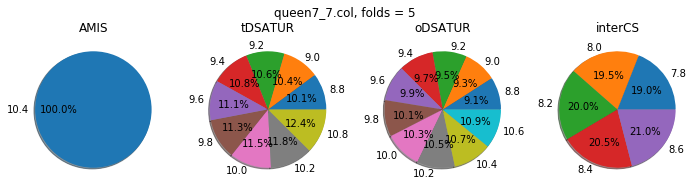

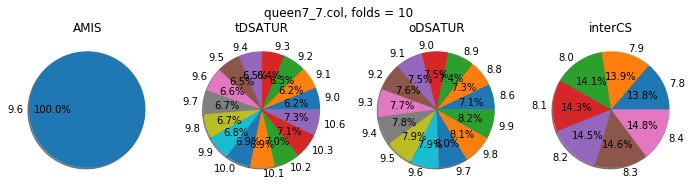

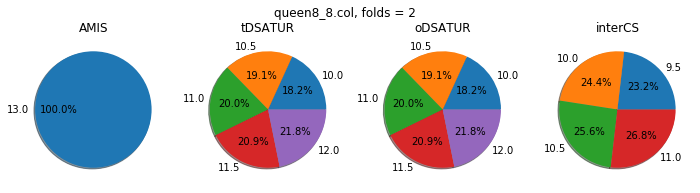

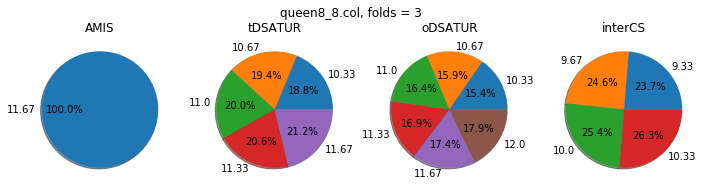

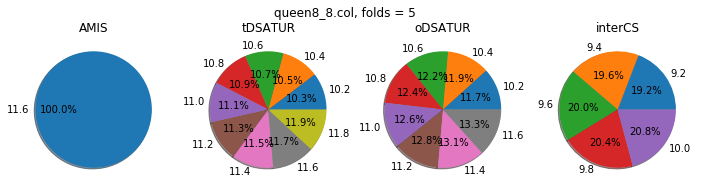

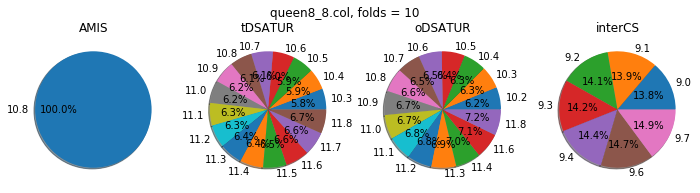

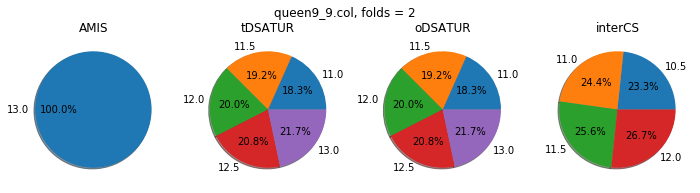

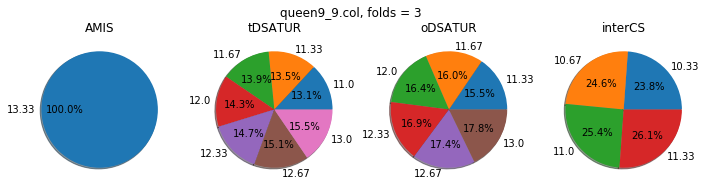

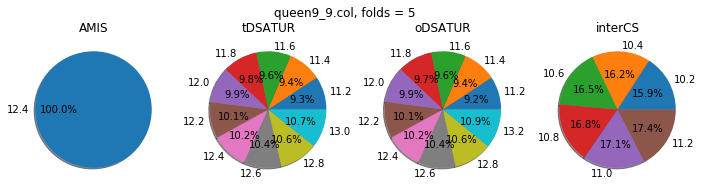

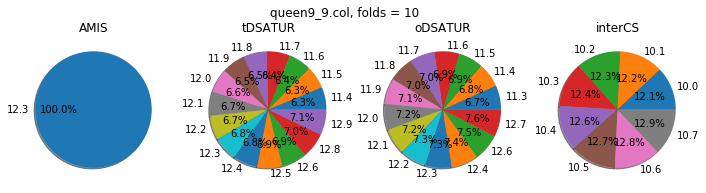

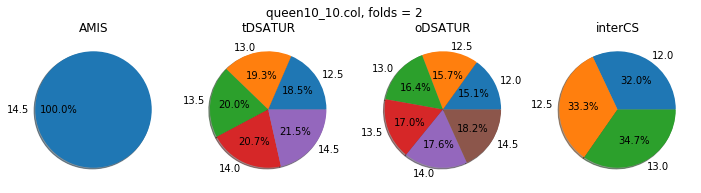

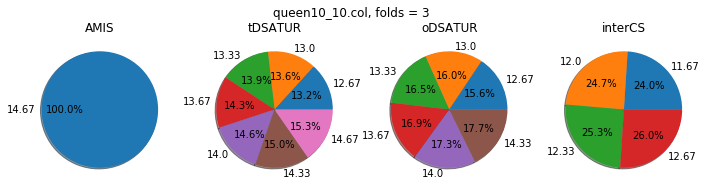

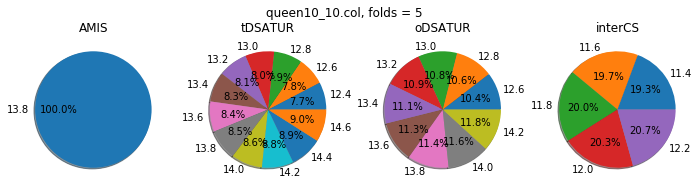

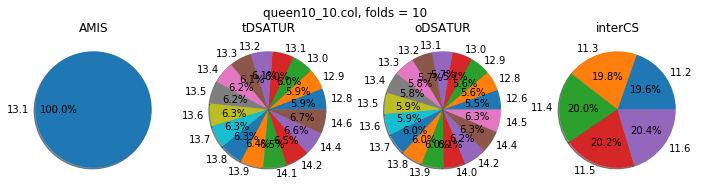

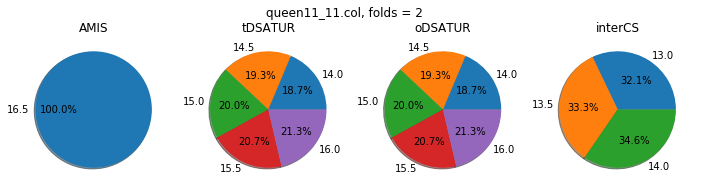

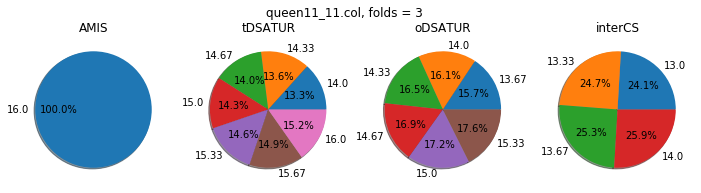

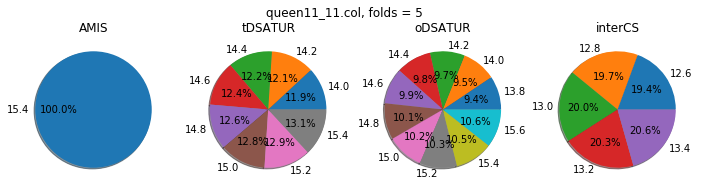

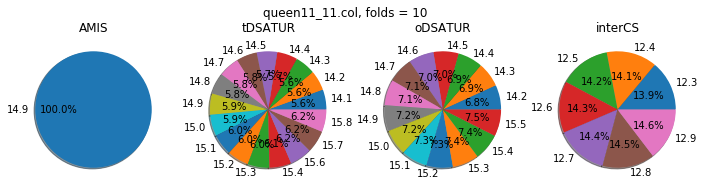

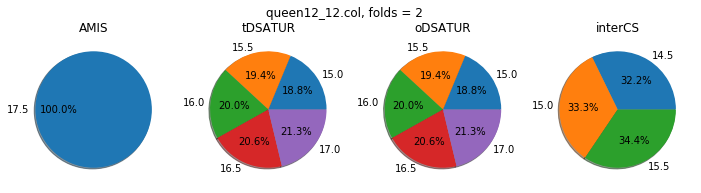

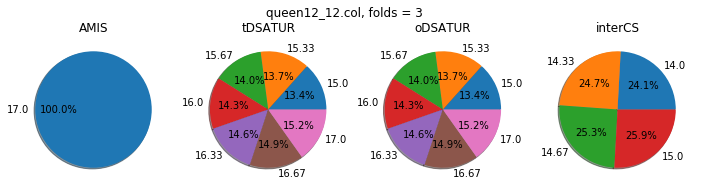

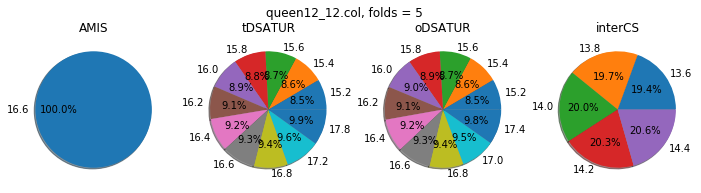

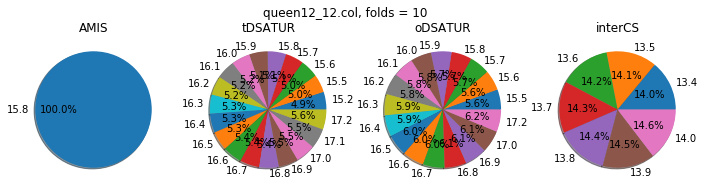

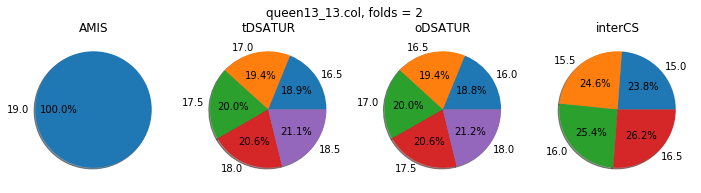

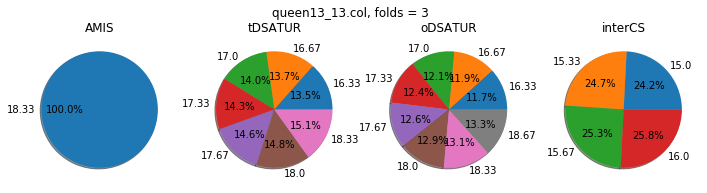

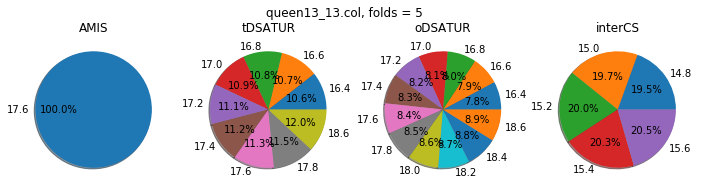

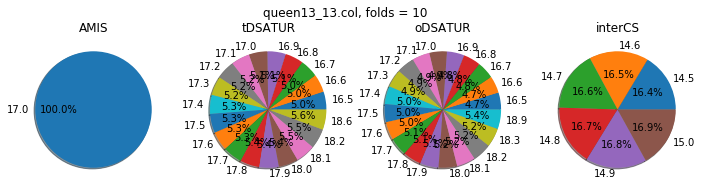

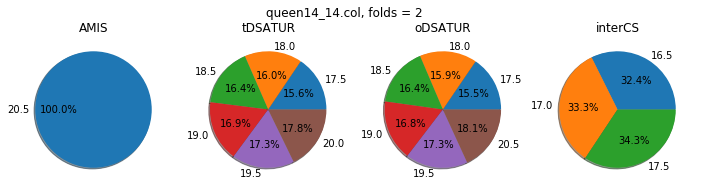

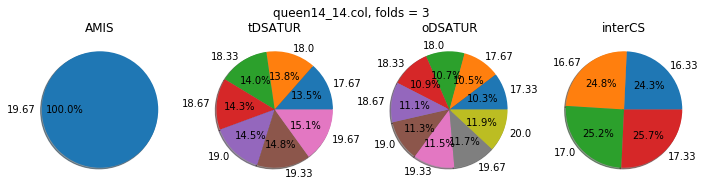

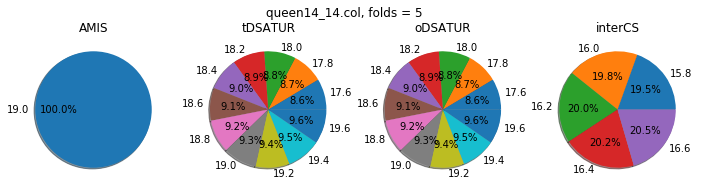

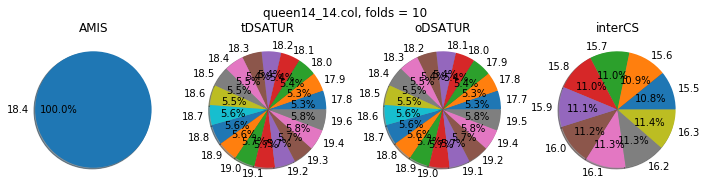

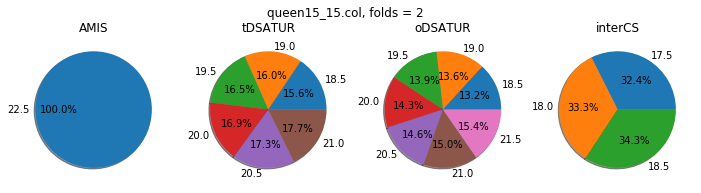

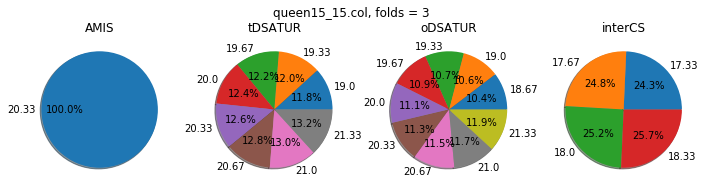

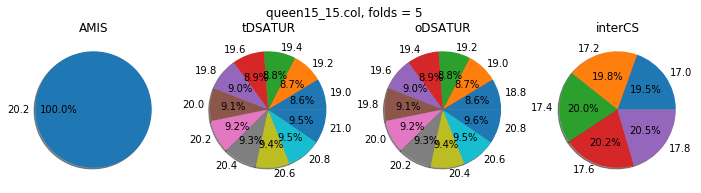

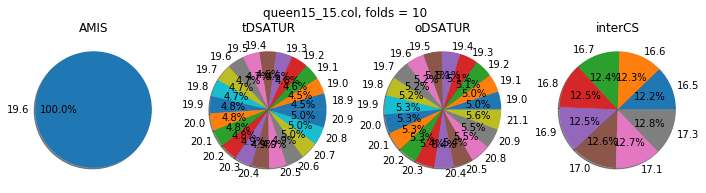

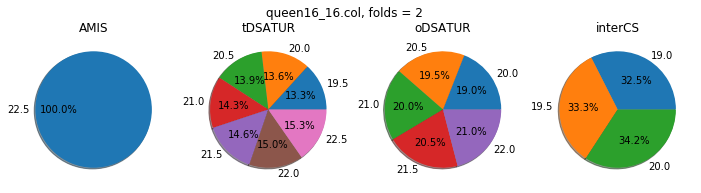

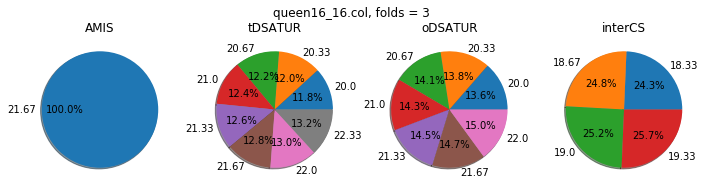

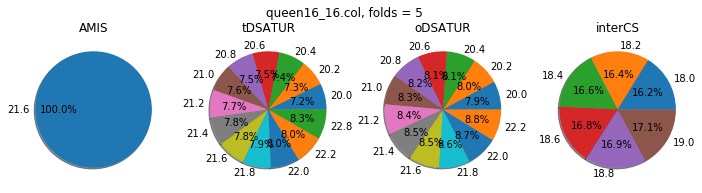

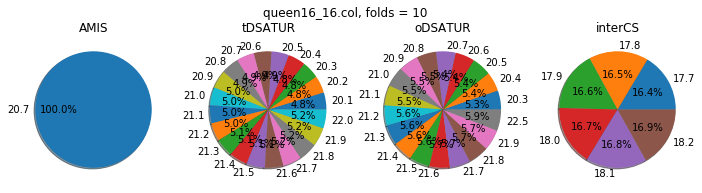

In [248]:
graphs = df.graph.unique()
folds_list = df.folds.unique()
x = np.arange(len(algorithms))

for graph in graphs:
    for i, folds in enumerate(folds_list):
        plt.figure(figsize=(12, 3))
        for j, alg in enumerate(algorithms):
            ax = plt.subplot(1, len(algorithms), j + 1)
            vals = df[(df['folds'] == folds) & (df['graph'] == graph) & (df['algorithm'] == alg)]
            accuracies = vals.ratio.values
            percentages = vals.ratio.values
            plt.pie(percentages, labels=accuracies, autopct='%1.1f%%', shadow=True)
            plt.title(alg)

        plt.suptitle('{}, folds = {}'.format(graph, folds))
        plt.show()

## Mycielski graphs

### Accuracy

In [243]:
acc_data_path = os.path.join(data_dir, 'myciel_graphs_accuracy.csv')
df = pd.read_csv(acc_data_path, index_col=0)
df.head()

folds    graph algorithm  ratio  percentage
0      2  myciel3      AMIS    3.5         100
1      2  myciel3   tDSATUR    3.5          48
2      2  myciel3   tDSATUR    4.0          52
3      2  myciel3   oDSATUR    3.5          48
4      2  myciel3   oDSATUR    4.0          52

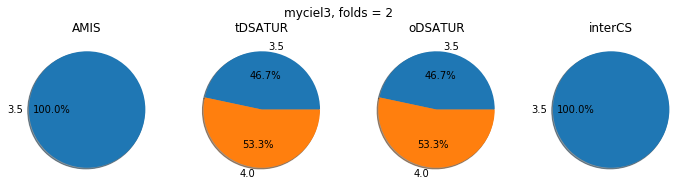

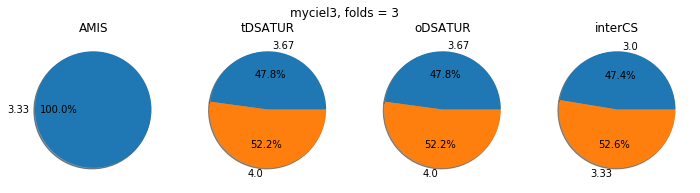

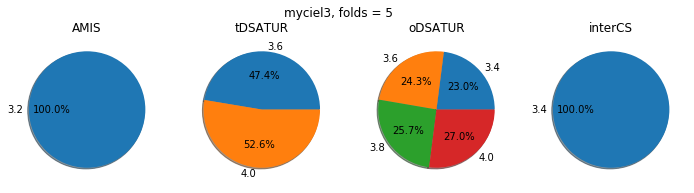

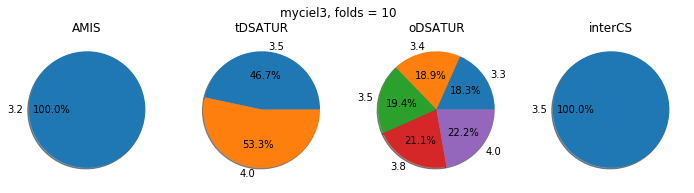

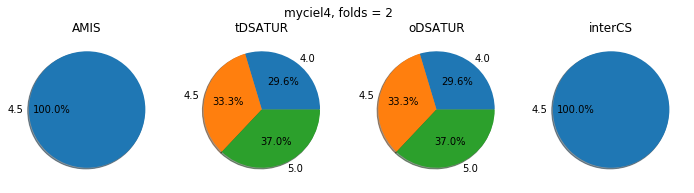

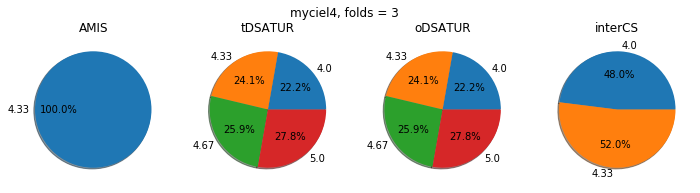

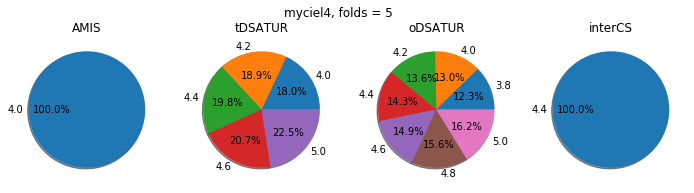

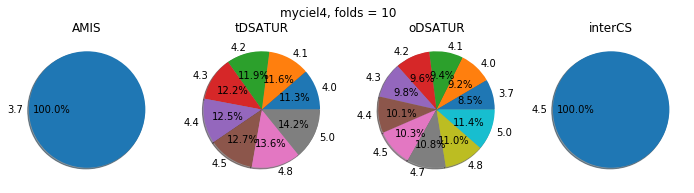

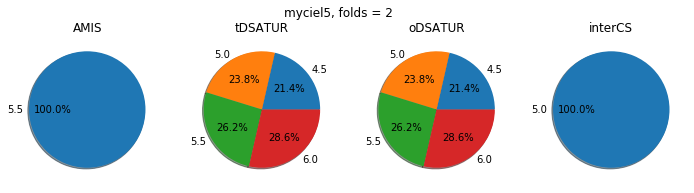

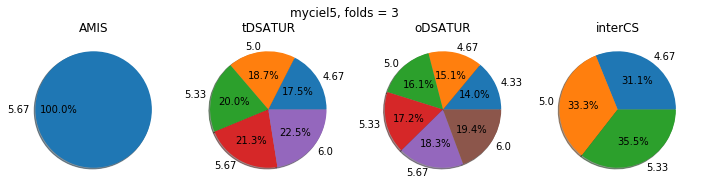

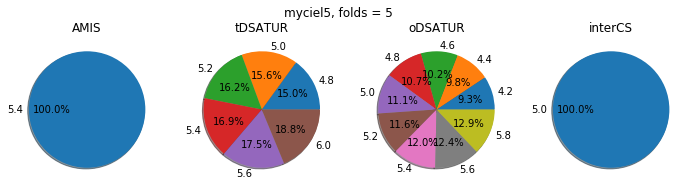

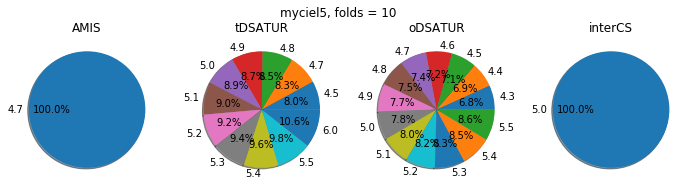

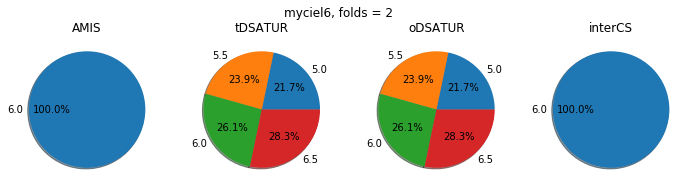

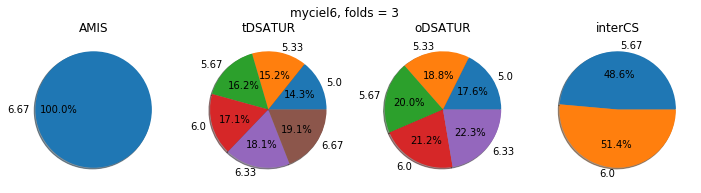

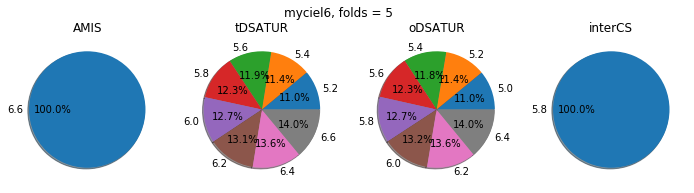

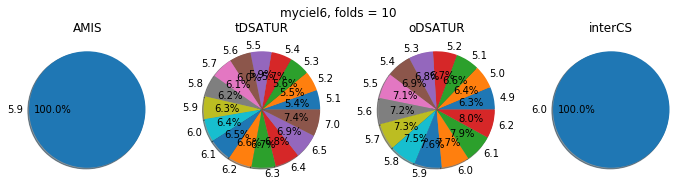

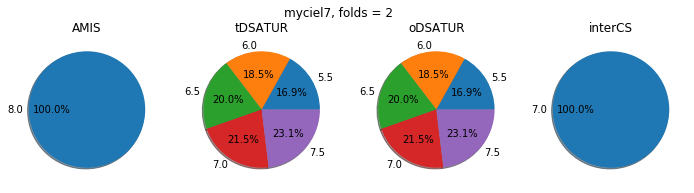

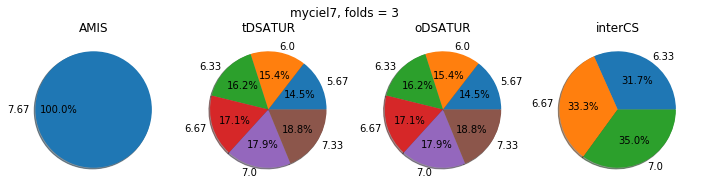

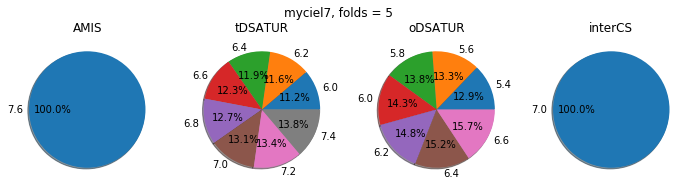

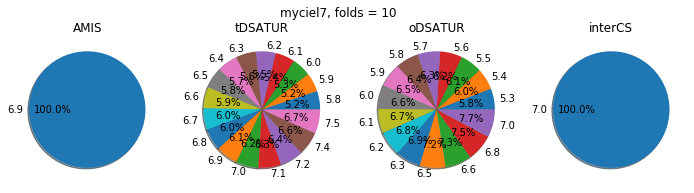

In [244]:
graphs = df.graph.unique()
folds_list = df.folds.unique()
x = np.arange(len(algorithms))

for graph in graphs:
    for i, folds in enumerate(folds_list):
        plt.figure(figsize=(12, 3))
        for j, alg in enumerate(algorithms):
            ax = plt.subplot(1, len(algorithms), j + 1)
            vals = df[(df['folds'] == folds) & (df['graph'] == graph) & (df['algorithm'] == alg)]
            accuracies = vals.ratio.values
            percentages = vals.ratio.values
            plt.pie(percentages, labels=accuracies, autopct='%1.1f%%', shadow=True)
            plt.title(alg)

        plt.suptitle('{}, folds = {}'.format(graph, folds))
        plt.show()